In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('data/new-site.csv', sep='\t')

In [9]:
data.head()

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38


In [18]:
data.groupby(by='site').mean()['dwell-time'][0]

90.84946236559139

In [22]:
data[data['site'] == 0]['dwell-time']

0        2
2       15
4       38
6      571
8      233
      ... 
294     39
295     22
296      7
298     89
299    138
Name: dwell-time, Length: 186, dtype: int64

In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Среднее время пребывания в группах А и B равны'
H1 = 'Среднее время пребывания в группе А больше, чем в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [23]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
# H1 = 'Среднее время в группе А меньше, чем в группе B'
H1 = 'Среднее время в группе А больше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=data[data['site'] == 0]['dwell-time'],
    b=data[data['site'] == 1]['dwell-time'], 
    alternative='greater'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.41
Принимаем нулевую гипотезу. Среднее время в группах одинаково


In [24]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(data[data['site'] == 0]['dwell-time'])
shapiro_result_b = shapiro(data[data['site'] == 1]['dwell-time'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

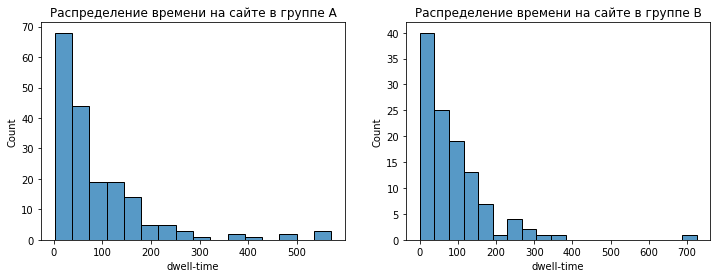

In [27]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x=data[data['site'] == 0]['dwell-time'], data=data, ax=axes[0])
sns.histplot(x=data[data['site'] == 1]['dwell-time'], data=data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');